In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
class Bolsa(): #defino la clase Bolsa
    def __init__(self, nombre=None): #esta línea sirve para definir que querés que haga cuando se crea la clase
        self.file = open(nombre or 'madrid', "r")  #lee el archivo de los nombres de las acciones
        self.__generateTablaAcciones() #llama al metodo generar tabla acciones
        self.__generateMaxAndMinAcciones() #llama al metodo generear max y min acciones

    def __getTicker(self, nombre): #este método obtiene los detalles de cada acción
        accion = yf.Ticker(nombre)
        if "currentPrice" in accion.info:  # Solo se consideran válidas aquellas que tengan un valor actual
            return (nombre, accion.info["longName"], accion.info["currentPrice"], accion.history)
        else:
            return []

    def __generateTablaAcciones(self): #genera la tabla acciones
        acciones = []
        for l in self.file: #for que reccorre el archivo de acciones
            accion = self.__getTicker(l.split()[0]) #manda el nombre de la accion al get ticker
            if len(accion) != 0:
                acciones.append(accion)
        #una vez que tiene todas las acciones las ordena de mayor a menor en base a su valor
        acciones.sort(key=lambda x: x[2], reverse=True)
        #guardo el vector de acciones
        self.acciones = acciones
        #guardo el dataframe de acciones
        self.dfAcciones = pd.DataFrame(np.array(acciones)[:, :3], columns=[
                                       'Acción', 'Nombre', 'Valor'])

    def getTablaAcciones(self): #metodo para obtener el dataframe de acciones
        return self.dfAcciones

    #método que realiza todas procesa los datos para obtener los 2 máximos y mínimos
    def __generateMaxAndMinAcciones(self): 
        maximos = np.array(self.acciones[0:2])
        minimos = np.array(self.acciones[-2:])

        self.history = np.concatenate((maximos[:, -1], minimos[:, -1]), axis=0)
        self.nombres = np.concatenate((maximos[:, 0], minimos[:, 0]), axis=0)

        self.dfMaxMinAcciones = pd.DataFrame(np.concatenate((maximos[:, :3], minimos[:, :3]), axis=0),
                        columns=['Acción', 'Nombre', 'Valor'])

    def getTablaMaxAndMinAcciones(self): #método que devuelve el dataframe de max y min
        return self.dfMaxMinAcciones
    
    def graficarAcciones(self): #método que grafica el historial de valores de los maximos y minimos
        fig, _ = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
        fig.suptitle('Gráficos de valor hasta la actualidad', fontsize=16)
        for i in range(4):
            axe = plt.subplot(2, 2, i+1)
            axe.set_title(self.nombres[i])
            data = self.history[i](period='max')
            data.plot(kind='line', y="Close", ax=axe)
            data.plot(kind='line', y="Open", ax=axe)
        fig.tight_layout(pad=3.0)


In [3]:
bolsa = Bolsa() #creo un objeto Bolsa

In [4]:
bolsa.getTablaAcciones() #obtengo la tabla acciones

,Acción,Nombre,Valor
0,ANA.MC,"Acciona, S.A.",167.1
1,CLNX.MC,"Cellnex Telecom, S.A.",54.22
2,AIR,AAR Corp.,35.72
3,FDR.MC,"Fluidra, S.A.",34.5
4,CIE.MC,"CIE Automotive, S.A.",23.22
5,ELE.MC,"Endesa, S.A.",19.92
6,EBRO.MC,"Ebro Foods, S.A.",16.98
7,FCC.MC,"Fomento de Construcciones y Contratas, S.A.",10.96
8,IDR.MC,"Indra Sistemas, S.A.",10.38
9,IBE.MC,"Iberdrola, S.A.",10.25


In [5]:
bolsa.getTablaMaxAndMinAcciones() #obtengo la tabla max y min

,Acción,Nombre,Valor
0,ANA.MC,"Acciona, S.A.",167.1
1,CLNX.MC,"Cellnex Telecom, S.A.",54.22
2,MDF.MC,"Duro Felguera, S.A.",0.9585
3,OLE.MC,"Deoleo, S.A.",0.3326


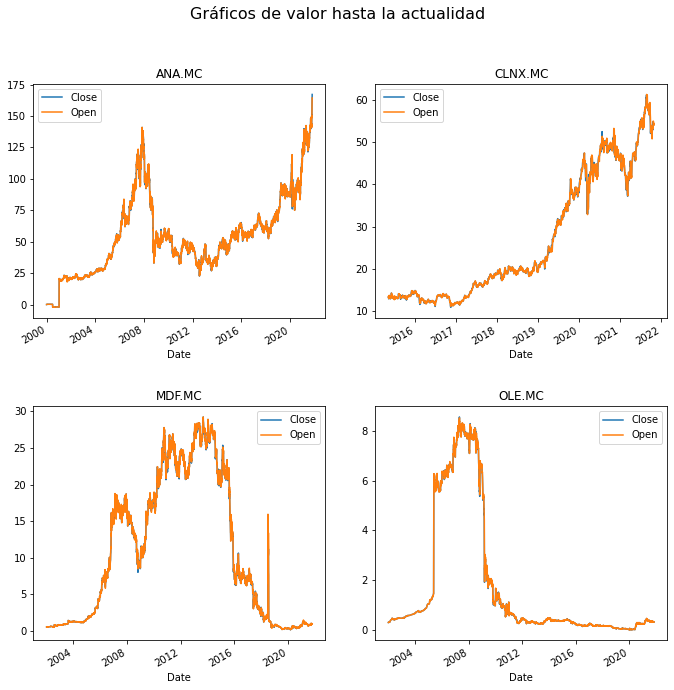

In [6]:
bolsa.graficarAcciones() #grafico los valores historicos del max y min